In [67]:
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
import scipy.io as scio
import random

DATAFILE = "gradient_descent_data.mat"

data = scio.loadmat(DATAFILE)
A = data['x']    # (1000, 2)
y = data['y']    # (1000, 1)
n, d = A.shape    # n = 1000 number of samples, d = 2 number of features

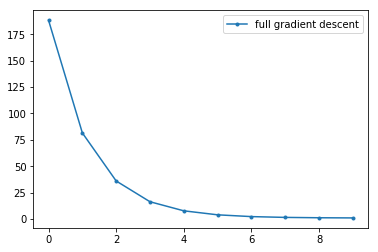

In [103]:
# Problem 3.a

alpha = 0.05
w = np.zeros( (d, 1), "float" )
errors_3a = np.zeros( (10, 1), "float" )
for i in range(10):
    grad_loss = 2 * A.T.dot(A).dot(w) - 2 * A.T.dot(y)
    w = w - alpha * grad_loss / (2 * n)
    errors_3a[i] = np.mean((A.dot(w) - y) ** 2)

plt.figure()
plt.plot(errors_3a, ".-", label="full gradient descent")
plt.legend(loc="best")
plt.show()

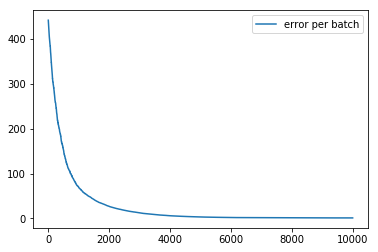

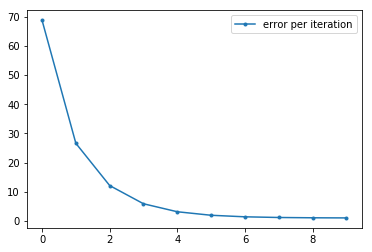

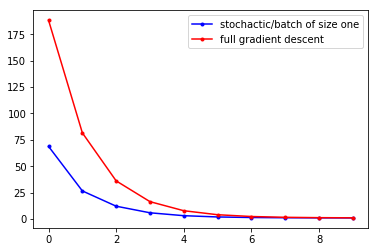

In [104]:
# Problem 3.b

alpha = 0.05
w = np.zeros( (d, 1), "float" )
errors_per_iter = np.zeros( (10, 1), "float" )
errors_per_batch = np.zeros( (10, n), "float" )
for i in range(10):
    for j in range(n):
        grad_loss = 2 * A[[j],:].T.dot(A[[j],:]).dot(w) - 2 * A[[j],:].T.dot(y[[j]])
        w = w - alpha * grad_loss / (2 * n)
        errors_per_batch[i,j] = np.mean((A.dot(w) - y) ** 2)
    errors_per_iter[i] = np.mean((A.dot(w) - y) ** 2)

plt.figure()
plt.plot(errors_per_batch.flatten(), label="error per batch")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter, ".-", label="error per iteration")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter, "b.-", label="stochactic/batch of size one")
plt.plot(errors_3a, "r.-", label="full gradient descent")
plt.legend(loc="best")
plt.show()

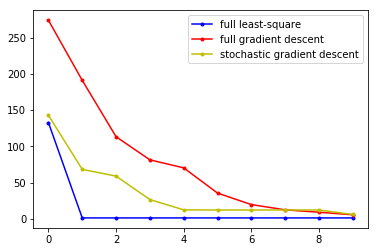

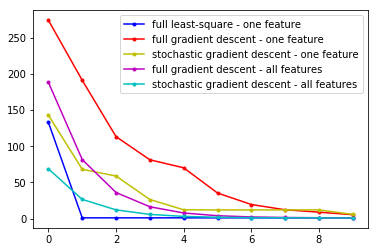

In [81]:
# Problem 3.c

alpha = 0.05
w1 = np.zeros( (d, 1), "float" )
w2 = np.zeros( (d, 1), "float" )
w3 = np.zeros( (d, 1), "float" )
errors1 = np.zeros( (10, 1), "float" )
errors2 = np.zeros( (10, 1), "float" )
errors3 = np.zeros( (10, 1), "float" )

for i in range(10):
    r = random.random()
    k = 0 if r < 0.5 else 1
    # full least-square
    w1[k] = npla.inv( A[:,[k]].T.dot(A[:,[k]]) ).dot( A[:,[k]].T.dot(y) )
    errors1[i] = np.mean((A.dot(w1) - y) ** 2)
    # full gradient descent
    grad_loss = 2 * A.T.dot(A).dot(w2) - 2 * A.T.dot(y)
    w2[k] = w2[k] - alpha * grad_loss[k] / (2 * n)
    errors2[i] = np.mean((A.dot(w2) - y) ** 2)
    # stochastic gradient descent
    for j in range(n):
        grad_loss = 2 * A[[j],:].T.dot(A[[j],:]).dot(w3) - 2 * A[[j],:].T.dot(y[[j]])
        w3[k] = w3[k] - alpha * grad_loss[k] / (2 * n)
    errors3[i] = np.mean((A.dot(w3) - y) ** 2)

plt.figure()
plt.plot(errors1, "b.-", label="full least-square")
plt.plot(errors2, "r.-", label="full gradient descent")
plt.plot(errors3, "y.-", label="stochastic gradient descent")
plt.legend(loc="best")
plt.figure()
plt.plot(errors1, "b.-", label="full least-square - one feature")
plt.plot(errors2, "r.-", label="full gradient descent - one feature")
plt.plot(errors3, "y.-", label="stochastic gradient descent - one feature")
plt.plot(errors_3a, "m.-", label="full gradient descent - all features")
plt.plot(errors_per_iter, "c.-", label="stochastic gradient descent - all features")
plt.legend(loc="best")
plt.show()

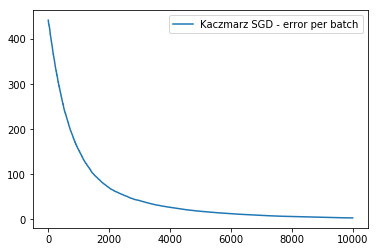

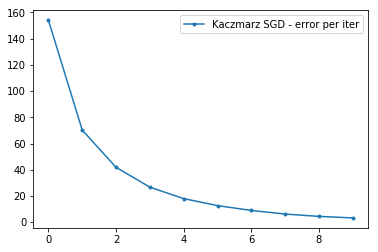

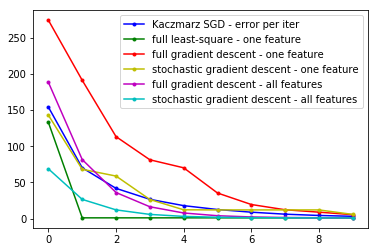

In [82]:
# Problem 3.d

w = np.zeros( (d, 1), "float" )
errors_per_iter_Kaczmarz = np.zeros( (10, 1), "float" )
errors_per_batch_Kaczmarz = np.zeros( (10, n), "float" )

alpha_list = []
prob_list = []
cummulative_prob_list = []
A_Froberius = np.sum(A ** 2)
for j in range(n):
    Aj_Froberius = np.sum( A[j, :] ** 2 )
    alpha_list.append(1 / Aj_Froberius)
    prob_list.append(Aj_Froberius / A_Froberius)
    if j == 0:
        cummulative_prob_list.append(Aj_Froberius / A_Froberius)
    else:
        cummulative_prob_list.append(cummulative_prob_list[j - 1] + Aj_Froberius / A_Froberius)
    
for i in range(10):
    for j in range(n):
        r = random.random()
        index = 0
        while cummulative_prob_list[index] < r:
            index += 1
        grad_loss = 2 * A[[index],:].T.dot(A[[index],:]).dot(w) - 2 * A[[index],:].T.dot(y[[index]])
        w = w - alpha_list[index] * grad_loss / (2 * n)
        errors_per_batch_Kaczmarz[i,j] = np.mean((A.dot(w) - y) ** 2)
    errors_per_iter_Kaczmarz[i] = np.mean((A.dot(w) - y) ** 2)

plt.figure()
plt.plot(errors_per_batch_Kaczmarz.flatten(), label="Kaczmarz SGD - error per batch")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_Kaczmarz, ".-", label="Kaczmarz SGD - error per iter")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_Kaczmarz, "b.-", label="Kaczmarz SGD - error per iter")
plt.plot(errors1, "g.-", label="full least-square - one feature")
plt.plot(errors2, "r.-", label="full gradient descent - one feature")
plt.plot(errors3, "y.-", label="stochastic gradient descent - one feature")
plt.plot(errors_3a, "m.-", label="full gradient descent - all features")
plt.plot(errors_per_iter, "c.-", label="stochastic gradient descent - all features")
plt.legend(loc="best")
plt.show()

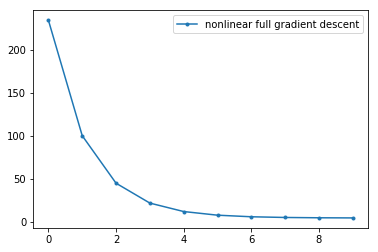

In [96]:
# Problem 3.e

y_nonlinear = y + 0.1 * A[:, [1]] ** 3

# Repeat Problem 3.a

alpha = 0.05
w = np.zeros( (d, 1), "float" )
errors_3a_nonlinear = np.zeros( (10, 1), "float" )
for i in range(10):
    grad_loss = 2 * A.T.dot(A).dot(w) - 2 * A.T.dot(y_nonlinear)
    w = w - alpha * grad_loss / (2 * n)
    errors_3a_nonlinear[i] = np.mean((A.dot(w) - y_nonlinear) ** 2)

plt.figure()
plt.plot(errors_3a_nonlinear, ".-", label="nonlinear full gradient descent")
plt.legend(loc="best")
plt.show()

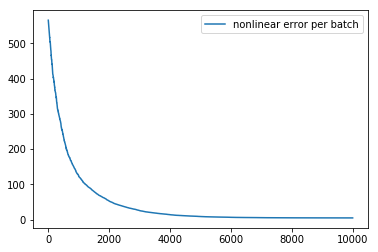

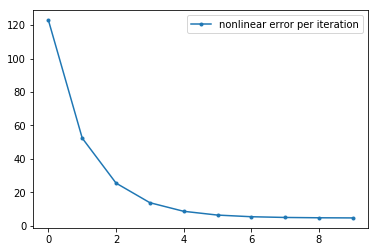

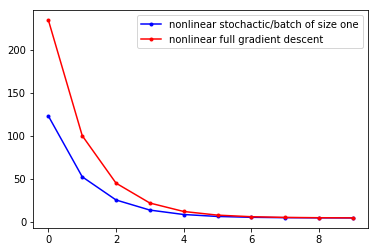

In [98]:
# Repeat Problem 3.b

alpha = 0.05
w = np.zeros( (d, 1), "float" )
errors_per_iter_nonlinear = np.zeros( (10, 1), "float" )
errors_per_batch_nonlinear = np.zeros( (10, n), "float" )
for i in range(10):
    for j in range(n):
        grad_loss = 2 * A[[j],:].T.dot(A[[j],:]).dot(w) - 2 * A[[j],:].T.dot(y_nonlinear[[j]])
        w = w - alpha * grad_loss / (2 * n)
        errors_per_batch_nonlinear[i,j] = np.mean((A.dot(w) - y_nonlinear) ** 2)
    errors_per_iter_nonlinear[i] = np.mean((A.dot(w) - y_nonlinear) ** 2)

plt.figure()
plt.plot(errors_per_batch_nonlinear.flatten(), label="nonlinear error per batch")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_nonlinear, ".-", label="nonlinear error per iteration")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_nonlinear, "b.-", label="nonlinear stochactic/batch of size one")
plt.plot(errors_3a_nonlinear, "r.-", label="nonlinear full gradient descent")
plt.legend(loc="best")
plt.show()

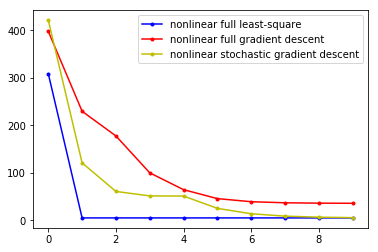

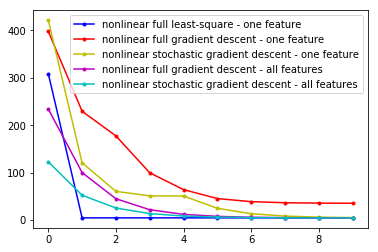

In [99]:
# Repeat Problem 3.c

alpha = 0.05
w1 = np.zeros( (d, 1), "float" )
w2 = np.zeros( (d, 1), "float" )
w3 = np.zeros( (d, 1), "float" )
errors1_nonlinear = np.zeros( (10, 1), "float" )
errors2_nonlinear = np.zeros( (10, 1), "float" )
errors3_nonlinear = np.zeros( (10, 1), "float" )

for i in range(10):
    r = random.random()
    k = 0 if r < 0.5 else 1
    # full least-square
    w1[k] = npla.inv( A[:,[k]].T.dot(A[:,[k]]) ).dot( A[:,[k]].T.dot(y_nonlinear) )
    errors1_nonlinear[i] = np.mean((A.dot(w1) - y_nonlinear) ** 2)
    # full gradient descent
    grad_loss = 2 * A.T.dot(A).dot(w2) - 2 * A.T.dot(y_nonlinear)
    w2[k] = w2[k] - alpha * grad_loss[k] / (2 * n)
    errors2_nonlinear[i] = np.mean((A.dot(w2) - y_nonlinear) ** 2)
    # stochastic gradient descent
    for j in range(n):
        grad_loss = 2 * A[[j],:].T.dot(A[[j],:]).dot(w3) - 2 * A[[j],:].T.dot(y_nonlinear[[j]])
        w3[k] = w3[k] - alpha * grad_loss[k] / (2 * n)
    errors3_nonlinear[i] = np.mean((A.dot(w3) - y_nonlinear) ** 2)

plt.figure()
plt.plot(errors1_nonlinear, "b.-", label="nonlinear full least-square")
plt.plot(errors2_nonlinear, "r.-", label="nonlinear full gradient descent")
plt.plot(errors3_nonlinear, "y.-", label="nonlinear stochastic gradient descent")
plt.legend(loc="best")
plt.figure()
plt.plot(errors1_nonlinear, "b.-", label="nonlinear full least-square - one feature")
plt.plot(errors2_nonlinear, "r.-", label="nonlinear full gradient descent - one feature")
plt.plot(errors3_nonlinear, "y.-", label="nonlinear stochastic gradient descent - one feature")
plt.plot(errors_3a_nonlinear, "m.-", label="nonlinear full gradient descent - all features")
plt.plot(errors_per_iter_nonlinear, "c.-", label="nonlinear stochastic gradient descent - all features")
plt.legend(loc="best")
plt.show()

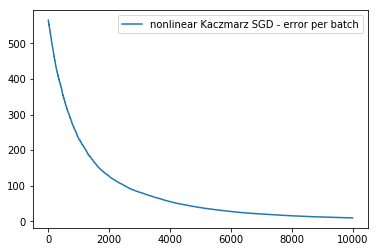

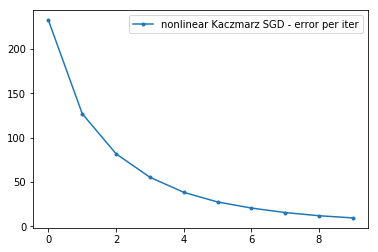

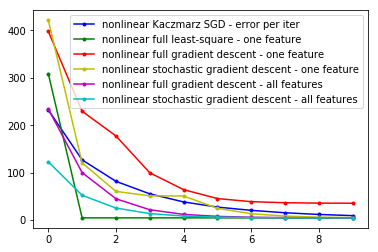

In [100]:
# Repeat Problem 3.d

w = np.zeros( (d, 1), "float" )
errors_per_iter_Kaczmarz_nonlinear = np.zeros( (10, 1), "float" )
errors_per_batch_Kaczmarz_nonlinear = np.zeros( (10, n), "float" )

alpha_list = []
prob_list = []
cummulative_prob_list = []
A_Froberius = np.sum(A ** 2)
for j in range(n):
    Aj_Froberius = np.sum( A[j, :] ** 2 )
    alpha_list.append(1 / Aj_Froberius)
    prob_list.append(Aj_Froberius / A_Froberius)
    if j == 0:
        cummulative_prob_list.append(Aj_Froberius / A_Froberius)
    else:
        cummulative_prob_list.append(cummulative_prob_list[j - 1] + Aj_Froberius / A_Froberius)
    
for i in range(10):
    for j in range(n):
        r = random.random()
        index = 0
        while cummulative_prob_list[index] < r:
            index += 1
        grad_loss = 2 * A[[index],:].T.dot(A[[index],:]).dot(w) - 2 * A[[index],:].T.dot(y_nonlinear[[index]])
        w = w - alpha_list[index] * grad_loss / (2 * n)
        errors_per_batch_Kaczmarz_nonlinear[i,j] = np.mean((A.dot(w) - y_nonlinear) ** 2)
    errors_per_iter_Kaczmarz_nonlinear[i] = np.mean((A.dot(w) - y_nonlinear) ** 2)

plt.figure()
plt.plot(errors_per_batch_Kaczmarz_nonlinear.flatten(), label="nonlinear Kaczmarz SGD - error per batch")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_Kaczmarz_nonlinear, ".-", label="nonlinear Kaczmarz SGD - error per iter")
plt.legend(loc="best")
plt.figure()
plt.plot(errors_per_iter_Kaczmarz_nonlinear, "b.-", label="nonlinear Kaczmarz SGD - error per iter")
plt.plot(errors1_nonlinear, "g.-", label="nonlinear full least-square - one feature")
plt.plot(errors2_nonlinear, "r.-", label="nonlinear full gradient descent - one feature")
plt.plot(errors3_nonlinear, "y.-", label="nonlinear stochastic gradient descent - one feature")
plt.plot(errors_3a_nonlinear, "m.-", label="nonlinear full gradient descent - all features")
plt.plot(errors_per_iter_nonlinear, "c.-", label="nonlinear stochastic gradient descent - all features")
plt.legend(loc="best")
plt.show()